In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(RColorBrewer)
library(colorspace)
library(tidyr)
library(gtools)

In [4]:
batfecal = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/batsonly_fecal.mdf.rds")
batoral = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/batsonly_oral.mdf.rds")
batskin = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/batsonly_skin.mdf.rds")

### Summarize by anatomical site and at the phylum level

In [34]:
#Gut

N = 12

batfecal$Rank2 = as.character(batfecal$Rank2)
batfecal <- within(batfecal, Rank2[Rank2 == 'p__'] <- 'Other')

topN = batfecal %>%
    group_by(Rank2) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank2) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank2")

mdf.other.fecal = batfecal %>%
    mutate(Rank2.other = ifelse(Rank2 %in% topN, as.character(Rank2), "Other")) %>%
    group_by(Sample,Host_Family,Rank2.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.summary.fecal = mdf.other.fecal %>%
    group_by(Rank2.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance))) %>%
    arrange(desc(avg))

mdf.summary.fecal$Rank2.other <- na.replace(mdf.summary.fecal$Rank2.other, 'Unclassified')
mdf.summary.fecal

Selecting by m


Rank2.other,avg,sd,sem
p__Proteobacteria,0.6038495266,0.326539890,0.0162661106
p__Firmicutes,0.2735718539,0.285307968,0.0142122022
p__Tenericutes,0.0316054081,0.112533855,0.0056057106
p__Cyanobacteria,0.0206039588,0.100061495,0.0049844181
p__Fusobacteria,0.0193550510,0.089427760,0.0044547140
p__Chlamydiae,0.0155618422,0.097967925,0.0048801299
p__Actinobacteria,0.0141371392,0.043225015,0.0021531914
p__Bacteroidetes,0.0086479340,0.050008967,0.0024911241
Unclassified,0.0082056236,0.061703158,0.0030736532
Other,0.0022385433,0.005915543,0.0002946742


In [35]:
#Oral

N = 12

batoral$Rank2 = as.character(batoral$Rank2)
batoral <- within(batoral, Rank2[Rank2 == 'p__'] <- 'Other')

topN = batoral %>%
    group_by(Rank2) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank2) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank2")

mdf.other.oral = batoral %>%
    mutate(Rank2.other = ifelse(Rank2 %in% topN, as.character(Rank2), "Other")) %>%
    group_by(Sample,Host_Family,Rank2.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.summary.oral = mdf.other.oral %>%
    group_by(Rank2.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance))) %>%
    arrange(desc(avg))

mdf.summary.oral$Rank2.other <- na.replace(mdf.summary.oral$Rank2.other, 'Unclassified')
mdf.summary.oral

Selecting by m


Rank2.other,avg,sd,sem
p__Proteobacteria,0.6806157055,0.266617541,0.0137497498
p__Firmicutes,0.1853261442,0.222353488,0.0114670056
p__Tenericutes,0.0633523865,0.161785838,0.0083434675
p__Bacteroidetes,0.0314747286,0.071627829,0.0036939232
p__Actinobacteria,0.0212472011,0.056353175,0.0029061931
p__Cyanobacteria,0.0045188012,0.027526511,0.0014195714
Other,0.0036702347,0.013332744,0.0006875838
Unclassified,0.0025288548,0.012434847,0.0006412782
p__Nitrospirae,0.0020782192,0.017286031,0.0008914590
p__Fusobacteria,0.0019219529,0.016469306,0.0008493396


In [36]:
#Skin

N = 12

batskin$Rank2 = as.character(batskin$Rank2)
batskin <- within(batskin, Rank2[Rank2 == 'p__'] <- 'Other')

topN = batskin %>%
    group_by(Rank2) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank2) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank2")

mdf.other.skin = batskin %>%
    mutate(Rank2.other = ifelse(Rank2 %in% topN, as.character(Rank2), "Other")) %>%
    group_by(Sample,Host_Family,Rank2.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.summary.skin = mdf.other.skin %>%
    group_by(Rank2.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance))) %>%
    arrange(desc(avg))

mdf.summary.skin$Rank2.other <- na.replace(mdf.summary.skin$Rank2.other, 'Unclassified')
mdf.summary.skin

Selecting by m


Rank2.other,avg,sd,sem
p__Proteobacteria,0.352925142,0.170841565,0.0079829021
p__Actinobacteria,0.230276062,0.138528657,0.0064730191
p__Firmicutes,0.191786521,0.152854329,0.0071424137
p__Bacteroidetes,0.065840246,0.052976968,0.0024754512
p__Euryarchaeota,0.042305144,0.084435691,0.0039454207
Unclassified,0.031169104,0.054501092,0.0025466688
p__Tenericutes,0.025438003,0.075760535,0.0035400573
Other,0.019680895,0.022618931,0.0010569133
p__Cyanobacteria,0.016059685,0.026348555,0.0012311871
p__Acidobacteria,0.008770894,0.012845626,0.0006002367


### Barcharts and scatterplots for family breakdowns

### Gut

In [37]:
###############
#  BARCHART   #
###############

N = 12

batfecal$Rank5 = as.character(batfecal$Rank5)
batfecal <- within(batfecal, Rank5[Rank5 == 'f__'] <- 'Other')

topN = batfecal %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

mdf.other.fecal = batfecal %>%
    mutate(Rank5.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Sample,Host_Family,Rank5.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.summary.fecal = mdf.other.fecal %>%
    group_by(Rank5.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance))) %>%
    arrange(desc(avg))

mdf.summary.fecal$Rank5.other <- na.replace(mdf.summary.fecal$Rank5.other, 'Unclassified')
mdf.summary.fecal

Selecting by m


Rank5.other,avg,sd,sem
f__Enterobacteriaceae,0.49987246,0.35563764,0.017715573
Other,0.14211622,0.23213387,0.011563412
f__Clostridiaceae,0.09445925,0.19377853,0.009652796
f__Streptococcaceae,0.05468063,0.12394398,0.006174089
f__Enterococcaceae,0.04005730,0.10833243,0.005396423
f__Mycoplasmataceae,0.03136410,0.11253523,0.005605779
f__Pasteurellaceae,0.03049601,0.11210327,0.005584262
f__Bacillaceae,0.02691319,0.09942744,0.004952834
f__Helicobacteraceae,0.02399046,0.09884628,0.004923884
f__Peptostreptococcaceae,0.02170568,0.09178223,0.004571999


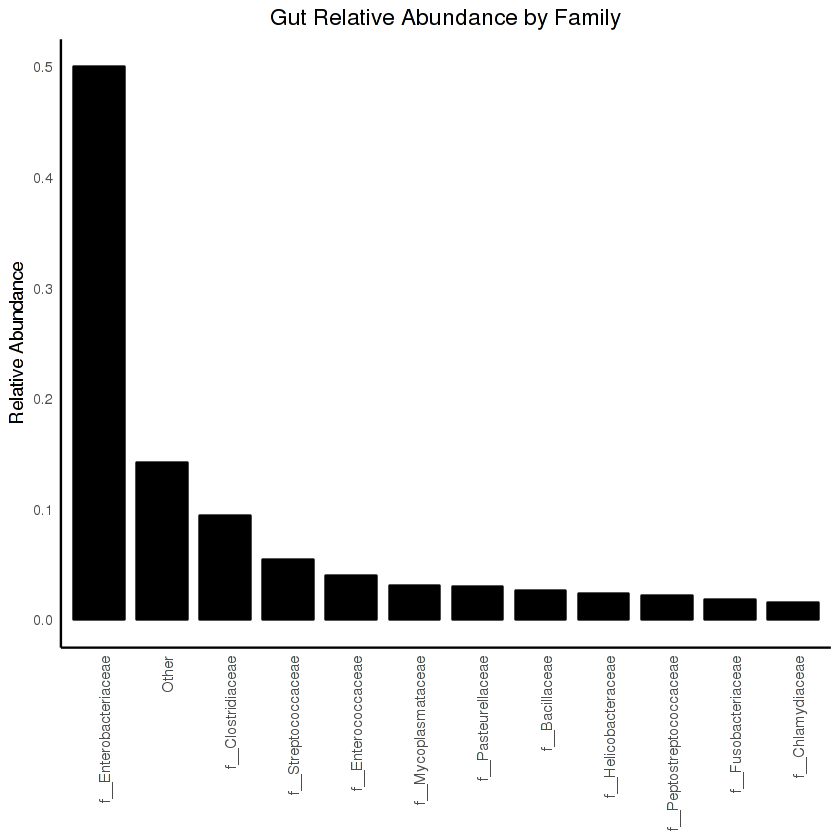

In [38]:
p = ggplot(na.omit(mdf.summary.fecal), aes(x= reorder(Rank5.other,-avg), y = avg)) + ggtitle("Gut Relative Abundance by Family")

p = p + geom_bar(stat="identity",fill="black", colour="black", width = .8, position = position_dodge(width=0.5))

p = p + theme_classic() + theme(
    strip.background = element_blank(),
    #legend.position = "bottom",
    axis.text.x = element_text(angle = 90, hjust = 1),
    #axis.text.y = element_blank(),
    axis.title.x=element_blank(),
    axis.ticks = element_blank(),
    #axis.title.y=element_blank(),
    plot.title=element_text(hjust=0.5))

#p = p + scale_y_continuous(limits = c(0, 0.6))

p = p + ylab("Relative Abundance") 

p

In [41]:
###############
# SCATTERPLOT #
###############

N = 12

batfecal$Rank5 = as.character(batfecal$Rank5)
batfecal <- within(batfecal, Rank5[Rank5 == 'f__'] <- 'Other')

topN = batfecal %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

mdf.other.fecal2 = batfecal %>%
    mutate(Rank5.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Sample,Host_Family,Rank5.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.other.fecal2$Rank5.other <- na.replace(mdf.other.fecal2$Rank5.other, 'Unclassified')

mdf.summary.fecal.2 = mdf.other.fecal2 %>%
    group_by(Sample,Rank5.other, Host_Family) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange(desc(avg))

mdf.summary.fecal.2$Rank5.other = as.character(mdf.summary.fecal.2$Rank5.other)
a <- within(mdf.summary.fecal.2, Rank5.other[Rank5.other == 'f__Enterobacteriaceae'] <- 'ab__Enterobacteriaceae') 
b <- within(a, Rank5.other[Rank5.other == 'f__Clostridiaceae'] <- 'b__Clostridiaceae') 
c <- within(b, Rank5.other[Rank5.other == 'f__Streptococcaceae'] <- 'c_Streptococcacaea') 
d <- within(c, Rank5.other[Rank5.other == 'f__Enterococcaceae'] <- 'd__Enterococcaceae') 
e <- within(d, Rank5.other[Rank5.other == 'f__Mycoplasmataceae'] <- 'e_Mycoplasmataceae') 
f <- within(e, Rank5.other[Rank5.other == 'f__Pasteurellaceae'] <- 'f__Pasteurellaceae') 
g <- within(f, Rank5.other[Rank5.other == 'f__Bacillaceae'] <- 'g__Bacillaceae') 
h <- within(g, Rank5.other[Rank5.other == 'f__Helicobacteraceae'] <- 'h__Helicobacteraceae') 
i <- within(h, Rank5.other[Rank5.other == 'f__Peptostreptococcaceae'] <- 'i__Peptostreptococcaceae')  
j <- within(i, Rank5.other[Rank5.other == 'f__Fusobacteriaceae'] <- 'j__Fusobacteriaceae') 
k <- within(j, Rank5.other[Rank5.other == 'f__Chlamydiaceae'] <- 'k__Chlamydiaceae') 
mdf.summary.fecal.3 <- within(k, Rank5.other[Rank5.other == 'Other'] <- 'a__Other') 

mdf.summary.fecal.3$Rank5.other = as.factor(mdf.summary.fecal.3$Rank5.other)

Selecting by m


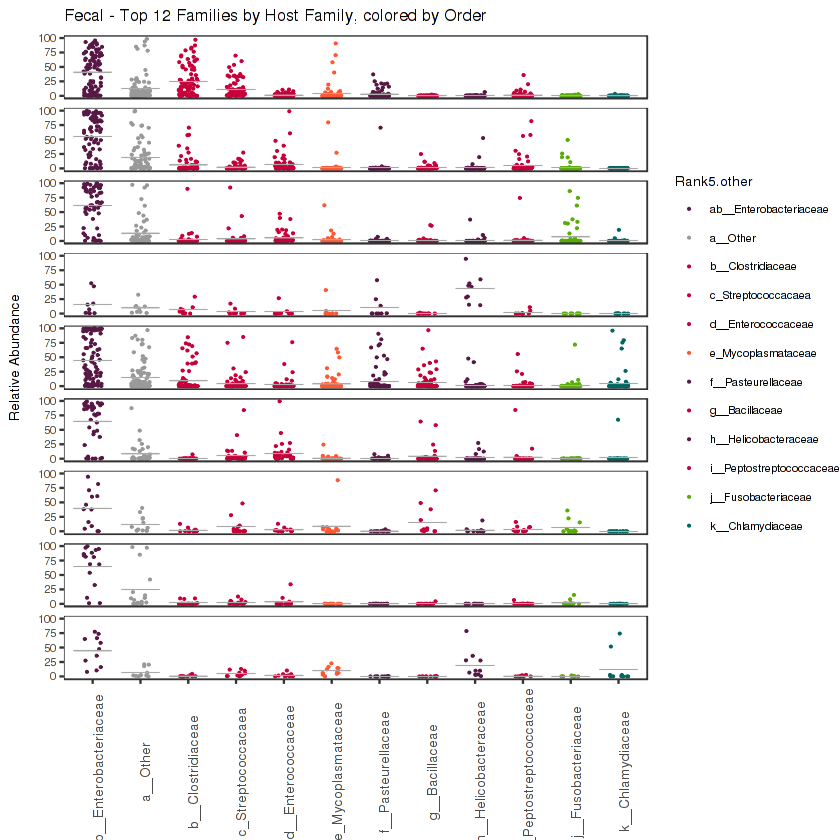

In [42]:
p = ggplot(mdf.summary.fecal.3, aes(x = Rank5.other, y = proportion, color=Rank5.other)) +
    ggtitle("Fecal - Top 12 Families by Host Family, colored by Order")

p = p + geom_point(size = .1, position = position_jitter(h = 0, w = 0.2))

p = p + facet_wrap(~Host_Family, ncol=1) + ylab("Relative Abundance")

#p = p + scale_color_brewer(palette = "BrBG")

p = p + scale_color_manual(values=c(
"#581845",
"#999999",
"#C70039",
"#C70039",
"#C70039",
"#FF5733",
"#581845",
"#C70039",
"#581845",
"#C70039",
"#58AD05",
"#026663"))    

    
p = p + theme_bw() + theme(axis.text.x = element_text(angle = 90,size = 8),
                           strip.background = element_blank(),
                           strip.text.x = element_blank(),
                           text=element_text(size=8, color="black", family="Times New Roman"),
                           legend.key = element_blank(),
                           #legend.position = "right",
                           axis.title.x=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           axis.title.y=element_text(margin=margin(0,10,0,0)))

p = p + stat_summary(fun.y = mean, fun.ymin = mean, fun.ymax = mean, geom = "crossbar", width=0.8, size=0.1, color="#A9A9A9", alpha=0.2)
                                 
p

### Oral

In [43]:
###############
#  BARCHART   #
###############

N = 12

batoral$Rank5 = as.character(batoral$Rank5)
batoral <- within(batoral, Rank5[Rank5 == 'f__'] <- 'Other')

topN = batoral %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

mdf.other.oral = batoral %>%
    mutate(Rank5.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Sample,Host_Family,Rank5.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.summary.oral = mdf.other.oral %>%
    group_by(Rank5.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance))) %>%
    arrange(desc(avg))

mdf.summary.oral$Rank5.other <- na.replace(mdf.summary.oral$Rank5.other, 'Unclassified')
mdf.summary.oral

Selecting by m


Rank5.other,avg,sd,sem
f__Pasteurellaceae,0.474881111,0.33993989,0.017531061
Other,0.092064349,0.17399567,0.008973142
f__Streptococcaceae,0.088074903,0.17018910,0.008776832
f__Neisseriaceae,0.083239237,0.15722730,0.008108379
f__Mycoplasmataceae,0.063313319,0.16179110,0.008343739
f__Enterobacteriaceae,0.060883641,0.16067553,0.008286208
f__Bacillaceae,0.040029649,0.11225442,0.005789080
f__Gemellaceae,0.036087305,0.08605994,0.004438203
f__[Weeksellaceae],0.024087881,0.06177580,0.003185844
f__Moraxellaceae,0.024061938,0.07052051,0.003636818


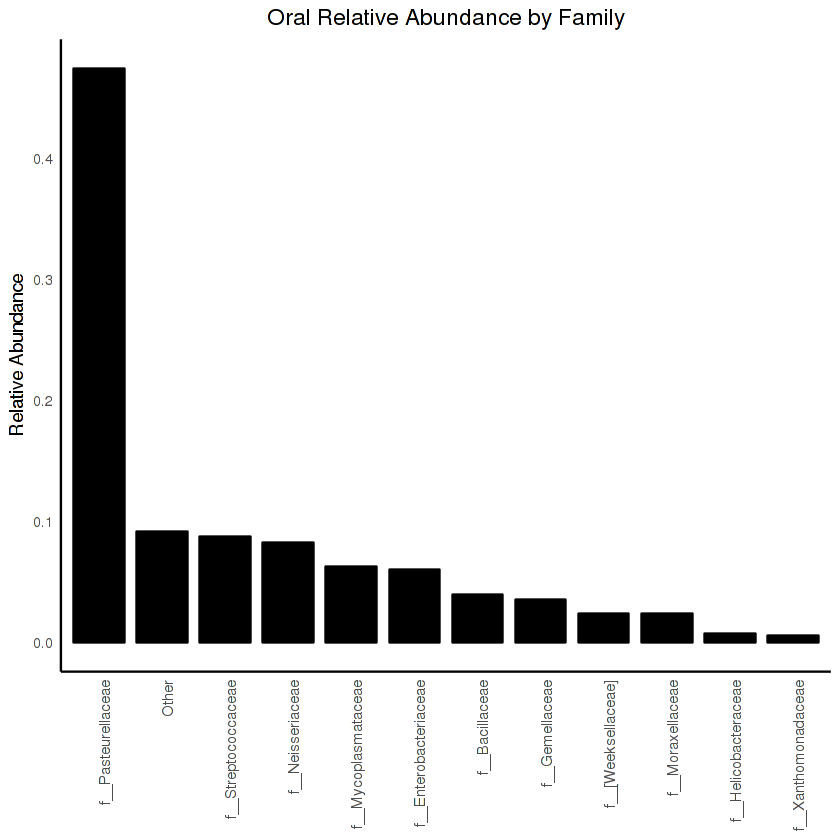

In [44]:
p = ggplot(na.omit(mdf.summary.oral), aes(x= reorder(Rank5.other,-avg), y = avg)) + ggtitle("Oral Relative Abundance by Family")

p = p + geom_bar(stat="identity",fill="black", colour="black", width = .8, position = position_dodge(width=0.5))

p = p + theme_classic() + theme(
    strip.background = element_blank(),
    #legend.position = "bottom",
    axis.text.x = element_text(angle = 90, hjust = 1),
    #axis.text.y = element_blank(),
    axis.title.x=element_blank(),
    axis.ticks = element_blank(),
    #axis.title.y=element_blank(),
    plot.title=element_text(hjust=0.5))

#p = p + scale_y_continuous(limits = c(0, 0.6))

p = p + ylab("Relative Abundance") 

p

In [45]:
###############
# SCATTERPLOT #
###############

N = 12

topN = batoral %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

batoral$Rank5 = as.character(batoral$Rank5)
batoral <- within(batoral, Rank5[Rank5 == 'f__'] <- 'Other')

mdf.other.oral2 = batoral %>%
    mutate(Rank5.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Sample,Host_Family,Rank5.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.other.oral2$Rank5.other <- na.replace(mdf.other.oral2$Rank5.other, 'Unclassified')

mdf.summary.oral.2 = mdf.other.oral2 %>%
    group_by(Sample,Rank5.other, Host_Family) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange(desc(avg))

mdf.summary.oral.2$Rank5.other = as.character(mdf.summary.oral.2$Rank5.other)
a <- within(mdf.summary.oral.2, Rank5.other[Rank5.other == 'f__Pasteurellaceae'] <- 'a_Pasteurellaceae') 
b <- within(a, Rank5.other[Rank5.other == 'Other'] <- 'b_Other') 
c <- within(b, Rank5.other[Rank5.other == 'f__Streptococcaceae'] <- 'c_Streptococcacaea') 
d <- within(c, Rank5.other[Rank5.other == 'f__Neisseriaceae'] <- 'd_Neisseriacaeae') 
e <- within(d, Rank5.other[Rank5.other == 'f__Mycoplasmataceae'] <- 'e_Mycoplasmataceae') 
f <- within(e, Rank5.other[Rank5.other == 'f__Enterobacteraceae'] <- 'f_Enterobacteraceae') 
g <- within(f, Rank5.other[Rank5.other == 'f__Bacillaceae'] <- 'g__Bacillaceae') 
h <- within(g, Rank5.other[Rank5.other == 'f__Gemellaceae'] <- 'h_Gemellaceae') 
i <- within(h, Rank5.other[Rank5.other == 'f__[Weeksellaceae]'] <- 'i_Weeksellaceae')  
j <- within(i, Rank5.other[Rank5.other == 'f__Moraxellaceae'] <- 'j_Moraxellaceae') 
k <- within(j, Rank5.other[Rank5.other == 'f__Helicobacteraceae'] <- 'k_Helicobacteraceae') 
mdf.summary.oral.3 <- within(k, Rank5.other[Rank5.other == 'f__Xanthomonadaceae'] <- 'l_Xanthomonadaceae') 

mdf.summary.oral.3$Rank5.other = as.factor(mdf.summary.oral.3$Rank5.other)

Selecting by m


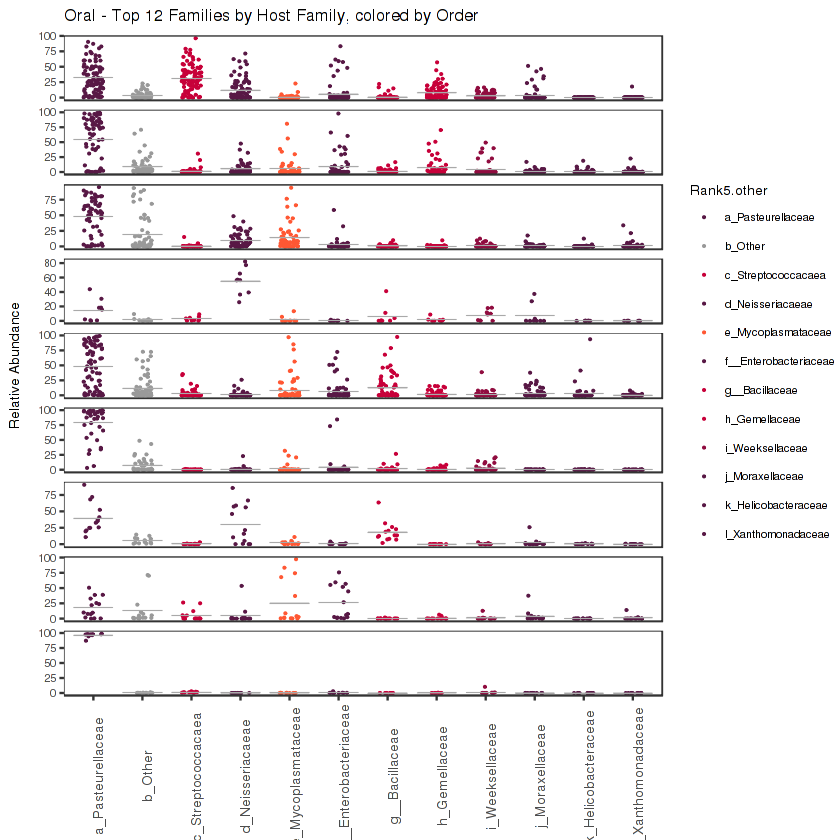

In [46]:
p = ggplot(mdf.summary.oral.3, aes(x = Rank5.other, y = proportion, color=Rank5.other)) +
    ggtitle("Oral - Top 12 Families by Host Family, colored by Order")

p = p + geom_point(size = .1, position = position_jitter(h = 0, w = 0.2))

p = p + facet_wrap(~Host_Family, scales = "free_y", ncol=1) + ylab("Relative Abundance")

#p = p + scale_color_brewer(palette = "BrBG")

p = p + scale_color_manual(values=c(
"#581845",
"#999999",
"#C70039",
"#581845",
"#FF5733",
"#581845",
"#C70039",
"#C70039",
"#900C3F",
"#581845",
"#581845",
"#581845"))    

    
p = p + theme_bw() + theme(axis.text.x = element_text(angle = 90,size = 8),
                           strip.background = element_blank(),
                           strip.text.x = element_blank(),
                           text=element_text(size=8, color="black", family="Times New Roman"),
                           legend.key = element_blank(),
                           #legend.position = "right",
                           axis.title.x=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           axis.title.y=element_text(margin=margin(0,10,0,0)))

p = p + stat_summary(fun.y = mean, fun.ymin = mean, fun.ymax = mean, geom = "crossbar", width=0.8, size=0.1, color="#A9A9A9", alpha=0.2)
                                 
p

### Skin

In [47]:
###############
#  BARCHART   #
###############

N = 12

batskin$Rank5 = as.character(batskin$Rank5)
batskin <- within(batskin, Rank5[Rank5 == 'f__'] <- 'Other')

topN = batskin %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

mdf.other.skin = batskin %>%
    mutate(Rank5.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Sample,Host_Family,Rank5.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.summary.skin = mdf.other.skin %>%
    group_by(Rank5.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance))) %>%
    arrange(desc(avg))

mdf.summary.skin$Rank5.other <- na.replace(mdf.summary.skin$Rank5.other, 'Unclassified')
mdf.summary.skin

Selecting by m


Rank5.other,avg,sd,sem
Other,0.52682596,0.18282969,0.008543070
f__Enterobacteriaceae,0.07432962,0.14293241,0.006678793
Unclassified,0.06309337,0.07326890,0.003423631
f__Bacillaceae,0.05799088,0.07600729,0.003551587
f__Moraxellaceae,0.05545662,0.07834364,0.003660758
f__Halobacteriaceae,0.04185629,0.08368427,0.003910309
f__Mycobacteriaceae,0.04103148,0.06411744,0.002996011
f__Pasteurellaceae,0.03386678,0.05402434,0.002524392
f__Staphylococcaceae,0.02937144,0.07186456,0.003358010
f__Pseudonocardiaceae,0.02798490,0.04211957,0.001968118


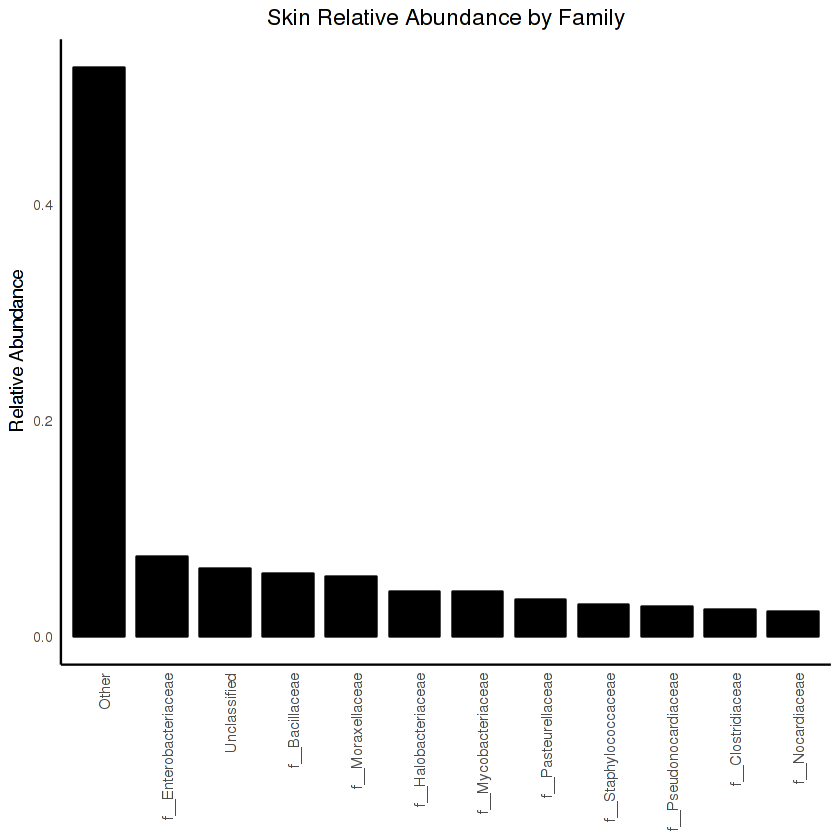

In [48]:
p = ggplot(na.omit(mdf.summary.skin), aes(x= reorder(Rank5.other,-avg), y = avg)) + ggtitle("Skin Relative Abundance by Family")

p = p + geom_bar(stat="identity",fill="black", colour="black", width = .8, position = position_dodge(width=0.5))

p = p + theme_classic() + theme(
    strip.background = element_blank(),
    #legend.position = "bottom",
    axis.text.x = element_text(angle = 90, hjust = 1),
    #axis.text.y = element_blank(),
    axis.title.x=element_blank(),
    axis.ticks = element_blank(),
    #axis.title.y=element_blank(),
    plot.title=element_text(hjust=0.5))

#p = p + scale_y_continuous(limits = c(0, 0.6))

p = p + ylab("Relative Abundance") 

p

In [49]:
###############
# SCATTERPLOT #
###############

N = 12

batskin$Rank5 = as.character(batskin$Rank5)
batskin <- within(batskin, Rank5[Rank5 == 'f__'] <- 'Other')


topN = batskin %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

mdf.other.skin2 = batskin %>%
    mutate(Rank5.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Sample,Host_Family,Rank5.other) %>%
    summarize(Abundance = sum(Abundance))

mdf.other.skin2$Rank5.other <- na.replace(mdf.other.skin2$Rank5.other, 'Unclassified')

mdf.summary.skin.2 = mdf.other.skin2 %>%
    group_by(Sample,Rank5.other, Host_Family) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd(Abundance)/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange(desc(avg))

mdf.summary.skin.2$Rank5.other = as.character(mdf.summary.skin.2$Rank5.other)
a <- within(mdf.summary.skin.2, Rank5.other[Rank5.other == 'f__Enterobacteriaceae'] <- 'ba__Enterobacteriaceae') 
b <- within(a, Rank5.other[Rank5.other == 'f__Pasteurellaceae'] <- 'g__Pasteurellaceae') 
c <- within(b, Rank5.other[Rank5.other == 'f__Moraxellaeae'] <- 'd__Moraxellaxeae') 
d <- within(c, Rank5.other[Rank5.other == 'f__Enterococcaceae'] <- 'd__Enterococcaceae') 
e <- within(d, Rank5.other[Rank5.other == 'f__Halobacteraceae'] <- 'e_Halobacteraceae') 
f <- within(e, Rank5.other[Rank5.other == 'f__Mycobacteraceae'] <- 'f__Mycobacteraceae') 
g <- within(f, Rank5.other[Rank5.other == 'f__Bacillaceae'] <- 'c__Bacillaceae') 
h <- within(g, Rank5.other[Rank5.other == 'f__Staphylococcaceae'] <- 'h__Staphylococcaceae') 
i <- within(h, Rank5.other[Rank5.other == 'f__Pseudonocardiaceae'] <- 'i__Pseudonocardiaceae')  
j <- within(i, Rank5.other[Rank5.other == 'f__Clostridiaceae'] <- 'j__Clostridiaceae') 
k <- within(j, Rank5.other[Rank5.other == 'f__Nocardiaceae'] <- 'k__Nocardiaceae') 
l <- within(k, Rank5.other[Rank5.other == 'Unclassified'] <- 'b_Unclassified')
mdf.summary.skin.3 <- within(l, Rank5.other[Rank5.other == 'Other'] <- 'a__Other') 

mdf.summary.skin.3$Rank5.other = as.factor(mdf.summary.skin.3$Rank5.other)

Selecting by m


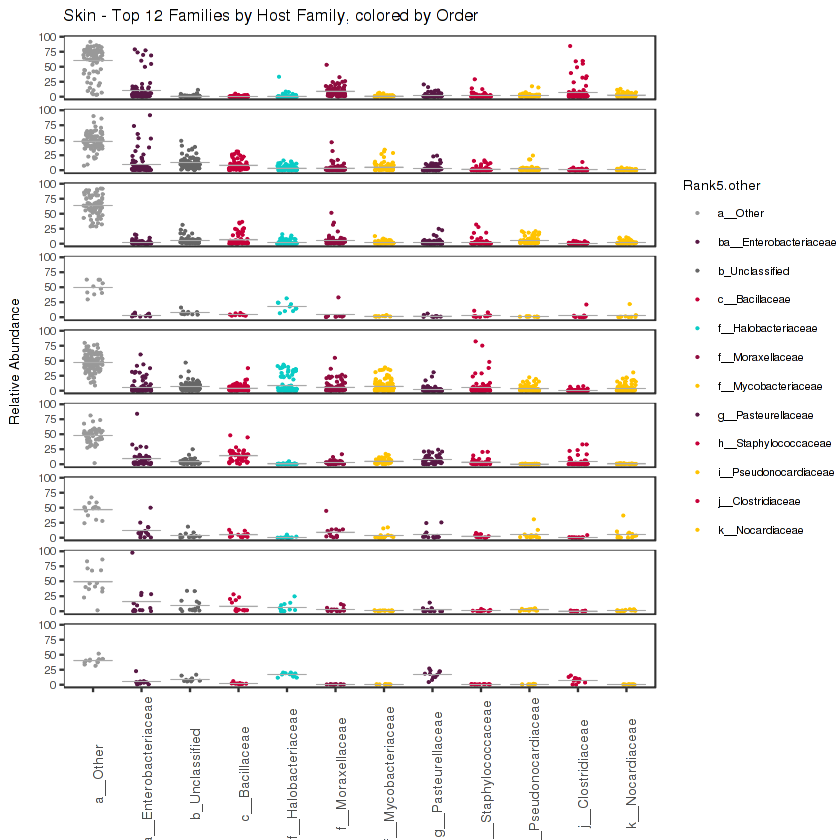

In [50]:
p = ggplot(mdf.summary.skin.3, aes(x = Rank5.other, y = proportion, color=Rank5.other)) +
    ggtitle("Skin - Top 12 Families by Host Family, colored by Order")

p = p + geom_point(size = .1, position = position_jitter(h = 0, w = 0.2))

p = p + facet_wrap(~Host_Family, ncol=1) + ylab("Relative Abundance")

#p = p + scale_color_brewer(palette = "Spectral")

p = p + scale_color_manual(values=c(
"#999999",
"#581845",
"#666666",
"#C70039",
"#09CCC6",
"#900C3F",
"#FFC300",
"#581845",
"#C70039",
"#FFC300",
"#C70039",
"#FFC300"))    

    
p = p + theme_bw() + theme(axis.text.x = element_text(angle = 90,size = 8),
                           strip.background = element_blank(),
                           strip.text.x = element_blank(),
                           text=element_text(size=8, color="black", family="Times New Roman"),
                           legend.key = element_blank(),
                           #legend.position = "right",
                           axis.title.x=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           axis.title.y=element_text(margin=margin(0,10,0,0)))

p = p + stat_summary(fun.y = mean, fun.ymin = mean, fun.ymax = mean, geom = "crossbar", width=0.8, size=0.1, color="#A9A9A9", alpha=0.2)
                                 
p